In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies_df=pd.read_csv('tmdb-movies.csv')
movies_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


###  General Assessing and Cleaning Actions
* Drop imdb_id and homepage column
* Check for duplicates and drop
* Check for null values and drop
* Check data types

In [3]:
movies_df_copy=movies_df.copy()

In [4]:
movies_df_copy.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
movies_df_copy.shape

(10866, 21)

**1) Drop homepage**

In [6]:
# use pandas drop function
movies_df_copy.drop(['homepage','imdb_id'], axis=1,inplace=True)

In [50]:
movies_df_copy.head()

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


**2) Drop duplicate**

In [8]:
movies_df_copy['id'].duplicated().sum()

1

In [9]:
movies_df_copy['id'].value_counts()

42194     2
16384     1
745       1
17037     1
72334     1
         ..
11615     1
251232    1
112205    1
101731    1
9600      1
Name: id, Length: 10865, dtype: int64

In [10]:
movies_df_copy.query('id==42194')

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [11]:
movies_df_copy.drop_duplicates(inplace=True)

In [12]:
movies_df_copy['id'].duplicated().sum()

0

**3) Drop null values**

In [13]:
movies_df_copy.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
movies_df_copy.dropna(inplace=True)

In [15]:
movies_df_copy.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [16]:
movies_df_copy.shape

(7031, 19)

## Exploratory Data Analysis

In [17]:
movies_df_copy.head(5)

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
# col_split function that eliminates the pipe('|') separator
def col_split(df, col_name, symbol_separator, new_col_name):
    col_sep = df[col_name].str.split(symbol_separator, expand=True)
    col_stack = col_sep.stack()
    result = col_stack.reset_index(level=1, drop=True)
    col_rename = result.rename(new_col_name)
    df = df.drop(col_name,axis=1)
    result1 = df.join(col_rename)
    return result1

### 1) Common genre

Working with the genres column by splitting rows with more than one genre

In [19]:
# splitting genres column
movies_df_copy = col_split(movies_df_copy, 'genres','|', 'genre')

In [20]:
movies_df_copy.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'tagline', 'keywords', 'overview', 'runtime',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'genre'],
      dtype='object')

In [21]:
movies_df_copy.shape

(18257, 19)

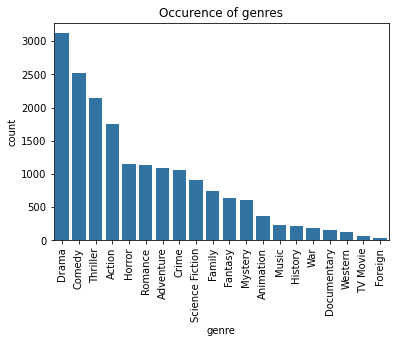

In [22]:
order=movies_df_copy['genre'].value_counts()
base_color=sns.color_palette()[0]
sns.countplot(data=movies_df_copy, x='genre',color=base_color, order=order.index)
plt.xticks(rotation=90)
plt.title('Occurence of genres');

Drama is the most common genre in this dataset.

In [23]:
genre_group=movies_df_copy.groupby('genre').sum()
genre_group

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genre,,,,,,,,,,
Action,77519850,1983.459793,62676905604,170128589413,188940,910006,10324.3,3504206,7.425227e+10,2.142668e+11
Adventure,42719055,1546.694423,52237116067,162140787198,119217,731109,6573.8,2179982,6.114989e+10,2.034815e+11
Animation,22843058,440.154111,15058996130,50611436598,29507,193635,2331.9,731158,1.640771e+10,5.743091e+10
Comedy,109294222,1862.520786,46435195718,135431711313,250054,612479,14937.4,5042352,5.568149e+10,1.735960e+11
Crime,43885487,893.750050,22341182333,55175718643,114698,358628,6561.6,2122385,2.725051e+10,7.347271e+10
Documentary,17746266,38.657472,235358148,888100128,15898,8797,1095.2,317268,2.501329e+08,9.986486e+08
Drama,155153626,2283.224109,50522084895,131847253548,349029,793646,19470.4,6231537,6.332027e+10,1.816151e+11
Family,31736260,770.621218,26632233365,86040273124,70370,311338,4507.4,1495509,3.070466e+10,1.044805e+11
Fantasy,23435495,798.536130,27989902037,85953899789,66366,369464,3807.2,1281272,3.212647e+10,9.930077e+10


In [24]:
genre_popularity = movies_df_copy.groupby('genre').sum().reset_index().sort_values('popularity')
genre_vote_count = movies_df_copy.groupby('genre').sum().reset_index().sort_values('vote_count')

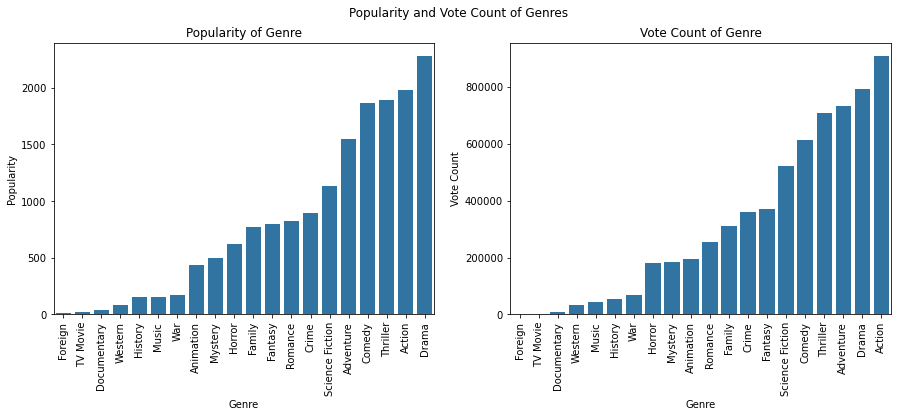

In [25]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
base_color = sns.color_palette()[0]
sns.barplot(data=genre_popularity, x='genre', y='popularity', color=base_color)
plt.xticks(rotation=90)
plt.title('Popularity of Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')

plt.subplot(1,2,2)
base_color = sns.color_palette()[0]
sns.barplot(data=genre_vote_count, x='genre', y='vote_count', color=base_color)
plt.xticks(rotation=90)
plt.title('Vote Count of Genre')
plt.xlabel('Genre')
plt.ylabel('Vote Count')

plt.suptitle('Popularity and Vote Count of Genres');

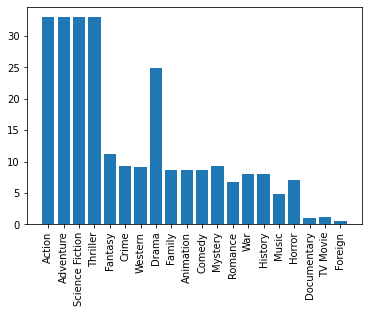

In [58]:
plt.bar(data=movies_df_copy,x='genre', height='popularity')
plt.xticks(rotation=90);

In [ ]:
genre_popularity = movies_df_copy.groupby('genre').sum().reset_index().sort_values('popularity')

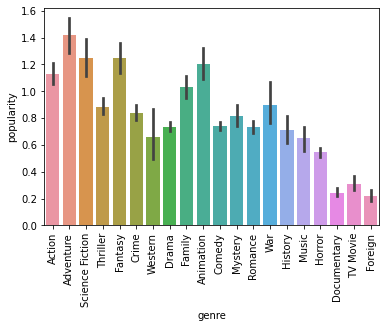

In [56]:
sns.barplot(data=movies_df_copy, x='genre',y='popularity')
plt.xticks(rotation=90);

### Genre with the highest budget

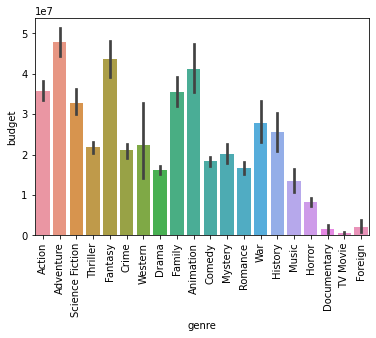

In [55]:
sns.barplot(data=movies_df_copy, x='genre',y='budget')
plt.xticks(rotation=90);

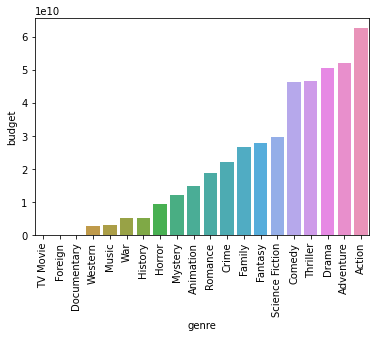

In [54]:
genre_budget = movies_df_copy.groupby('genre').sum().reset_index().sort_values('budget')
sns.barplot(data=genre_budget, x='genre',y='budget')
plt.xticks(rotation=90);

In [31]:
movies_df_copy['budget'].describe()

count    1.825700e+04
mean     2.399078e+07
std      3.941387e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.500000e+06
75%      3.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [32]:
np.log10(movies_df_copy['budget'].describe())

count    4.261429
mean     7.380044
std      7.595649
min          -inf
25%          -inf
50%      6.812913
75%      7.477121
max      8.628389
Name: budget, dtype: float64

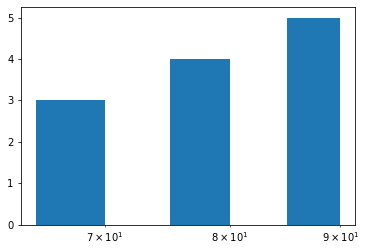

In [45]:
log_binsize = 0.5
bins = 10 * np.arange(6.5, np.log10(movies_df_copy['budget'].max())+log_binsize, log_binsize)
plt.hist(data=movies_df_copy, x='budget', bins=bins)
plt.xscale('log')

In [27]:
movies_df[['keywords','tagline','overview']]

,keywords,tagline,overview
0,monster|dna|tyrannosaurus rex|velociraptor|island,The park is open.,Twenty-two years after the events of Jurassic ...
1,future|chase|post-apocalyptic|dystopia|australia,What a Lovely Day.,An apocalyptic story set in the furthest reach...
2,based on novel|revolution|dystopia|sequel|dyst...,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...
3,android|spaceship|jedi|space opera|3d,Every generation has a story.,Thirty years after defeating the Galactic Empi...
4,car race|speed|revenge|suspense|car,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...
...,...,...,...
10861,surfer|surfboard|surfing,NaN,"The Endless Summer, by Bruce Brown, is one of ..."
10862,car race|racing|formula 1,Cinerama sweeps YOU into a drama of speed and ...,Grand Prix driver Pete Aron is fired by his te...
10863,car|trolley|stealing car,NaN,An insurance agent who moonlights as a carthie...
10864,spoof,WOODY ALLEN STRIKES BACK!,"In comic Woody Allen's film debut, he took the..."


In [28]:
movies_df['tagline'].isna().sum()

2824

In [29]:
movies_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')